## Bank Marketing


The problem for this course project is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client subscribes a term deposit or not. The target class is the last attribute (subscribed) and has two values (yes and no).

## Attribute Information:

1.	age (numeric)

2.	job: type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3.	marital: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)

4.	education: (categorical:  'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

5.	housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

6.	loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

7.	contact: contact communication type (categorical: 'cellular', 'telephone')

8.	month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

9.	day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')

10.	duration: last contact duration, in seconds (numeric). 

11.	campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

12.	pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

13.	poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

14.	nr.employed: number of employees - quarterly indicator (numeric)


### Target Attribute
Subscribed - has the client subscribed a term deposit? (binary: 'yes','no')


### Importing Librarys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing Data Set

In [2]:
data = pd.read_csv('C:/Users/User/Desktop/New folder/trainset.csv')

In [3]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,999,nonexistent,5191.0,yes
1,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,999,nonexistent,5191.0,yes
2,49,technician,married,basic.9y,no,no,telephone,may,mon,1467,1,999,nonexistent,5191.0,yes
3,41,technician,married,professional.course,yes,no,telephone,may,mon,579,1,999,nonexistent,5191.0,yes
4,45,blue-collar,married,basic.9y,yes,no,telephone,may,mon,461,1,999,nonexistent,5191.0,yes


### Exploratory data Analysis

In [4]:
print(f'Shape of dataframe is: {data.shape}')


Shape of dataframe is: (29271, 15)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29271 entries, 0 to 29270
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          29271 non-null  int64  
 1   job          29271 non-null  object 
 2   marital      29271 non-null  object 
 3   education    29271 non-null  object 
 4   housing      29271 non-null  object 
 5   loan         29271 non-null  object 
 6   contact      29271 non-null  object 
 7   month        29271 non-null  object 
 8   day_of_week  29271 non-null  object 
 9   duration     29271 non-null  int64  
 10  campaign     29271 non-null  int64  
 11  pdays        29271 non-null  int64  
 12  poutcome     29271 non-null  object 
 13  nr.employed  29271 non-null  float64
 14  Subscribed   29271 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.3+ MB


In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome',
       'nr.employed', 'Subscribed'],
      dtype='object')

#### Some basic Statistics

In [7]:
data.describe()

,age,duration,campaign,pdays,nr.employed
count,29271.000000,29271.000000,29271.000000,29271.000000,29271.000000
mean,40.126132,266.334973,2.737556,988.235455,5205.364012
std,9.522742,272.826726,3.085469,102.879851,36.306531
min,17.000000,0.000000,1.000000,0.000000,5017.500000
25%,32.000000,103.000000,1.000000,999.000000,5191.000000
50%,39.000000,179.000000,2.000000,999.000000,5228.100000
75%,47.000000,327.000000,3.000000,999.000000,5228.100000
max,88.000000,4918.000000,56.000000,999.000000,5228.100000


Age range, from 17 to 88 years old. However, a majority of age of 32 and 47 (32 to 47 years old fall within the 25th to 75th

percentiles). The distribution of customer age is fairly normal with a small standard deviation.




#### check the each columns contaning unique values 

In [8]:
# Number of distinct values in variables
for i, column in enumerate(data.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(data[column].nunique()))

0. Age: 70
1. Job: 12
2. Marital: 4
3. Education: 8
4. Housing: 3
5. Loan: 3
6. Contact: 2
7. Month: 10
8. Day_Of_Week: 5
9. Duration: 1487
10. Campaign: 42
11. Pdays: 18
12. Poutcome: 3
13. Nr.Employed: 7
14. Subscribed: 2


In [9]:
#Checking out the categories and their respective counts in each feature
print("Job:",data.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",data.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",data.education.value_counts(),sep = '\n')
print("-"*40)
print("marital:",data.marital.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",data.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",data.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",data.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",data.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",data.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("duration:",data.duration.value_counts(),sep = '\n')
print("-"*40)
print("campaign:",data.campaign.value_counts(),sep = '\n')
print("-"*40)

print("pdays:",data.pdays.value_counts(),sep = '\n')
print("-"*40)

print("Subscribed:",data.Subscribed.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           7313
blue-collar      6697
technician       5094
services         2833
management       2112
entrepreneur     1109
self-employed    1036
retired           946
housemaid         853
unemployed        705
student           313
unknown           260
Name: job, dtype: int64
----------------------------------------
Marital:
married     18387
single       7469
divorced     3364
unknown        51
Name: marital, dtype: int64
----------------------------------------
Education:
university.degree      8562
high.school            6563
basic.9y               4314
professional.course    3831
basic.4y               3070
basic.6y               1689
unknown                1227
illiterate               15
Name: education, dtype: int64
----------------------------------------
marital:
married     18387
single       7469
divorced     3364
unknown        51
Name: marital, dtype: int64
----------------------------------------
Housing loan:
yes        14863
no         13695
unknown     

In [10]:
# unkown value is 

### target varaible

In [11]:
data['Subscribed']

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
29266     no
29267     no
29268     no
29269     no
29270     no
Name: Subscribed, Length: 29271, dtype: object

In [12]:
# Convert target variable into numeric
data.Subscribed = data.Subscribed.map({'no':0, 'yes':1}).astype('int64')

In [13]:
data['Subscribed'].value_counts()

0    26075
1     3196
Name: Subscribed, dtype: int64

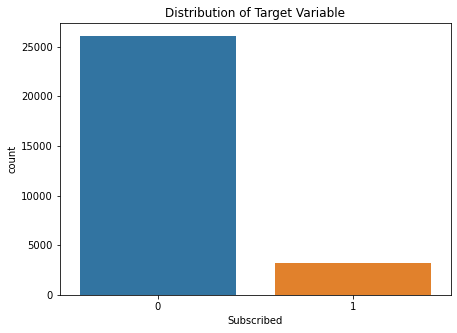

In [14]:
plt.figure(figsize = (7,5))
sns.countplot('Subscribed',data=data).set_title('Distribution of Target Variable')
plt.show()

#### Remove Unkown value

In [15]:
data.replace('unknown', np.NaN, inplace=True)

In [16]:
data.isnull().sum()/len(data)*100


age            0.000000
job            0.888251
marital        0.174234
education      4.191862
housing        2.435858
loan           2.435858
contact        0.000000
month          0.000000
day_of_week    0.000000
duration       0.000000
campaign       0.000000
pdays          0.000000
poutcome       0.000000
nr.employed    0.000000
Subscribed     0.000000
dtype: float64

In [17]:
data.isnull().sum()

age               0
job             260
marital          51
education      1227
housing         713
loan            713
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
poutcome          0
nr.employed       0
Subscribed        0
dtype: int64

### remove NaN value with mode 

In [18]:
print('mode of job =' ,data['job'].mode()[0])
print('mode of marital =' ,data['marital'].mode()[0])
print('mode of education =' ,data['education'].mode()[0])
print('mode of housing =' ,data['housing'].mode()[0])
print('mode of loan =' ,data['loan'].mode()[0])


mode of job = admin.
mode of marital = married
mode of education = university.degree
mode of housing = yes
mode of loan = no


In [19]:
data['job']=data['job'].fillna(data['job'].mode()[0])
data['marital']=data['marital'].fillna(data['marital'].mode()[0])
data['education']=data['education'].fillna(data['education'].mode()[0])
data['housing']=data['housing'].fillna(data['housing'].mode()[0])
data['loan']=data['loan'].fillna(data['loan'].mode()[0])


### Check missing value

In [20]:
data.isnull().sum()

age            0
job            0
marital        0
education      0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
poutcome       0
nr.employed    0
Subscribed     0
dtype: int64

In [21]:
data.isnull().sum().sum()

0

<AxesSubplot:>

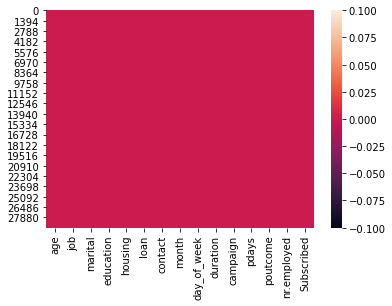

In [22]:
sns.heatmap(data.isnull())

#### There is no missing value in the dataset or data is clean

#### check correlation

In [23]:
data.corr()

,age,duration,campaign,pdays,nr.employed,Subscribed
age,1.000000,-0.023490,0.011435,-0.010726,-0.004494,-0.018027
duration,-0.023490,1.000000,-0.074162,-0.038289,-0.161586,0.466157
campaign,0.011435,-0.074162,1.000000,0.036038,0.123702,-0.065121
pdays,-0.010726,-0.038289,0.036038,1.000000,0.351073,-0.268149
nr.employed,-0.004494,-0.161586,0.123702,0.351073,1.000000,-0.636315
Subscribed,-0.018027,0.466157,-0.065121,-0.268149,-0.636315,1.000000


Text(114.0, 0.5, 'Features')

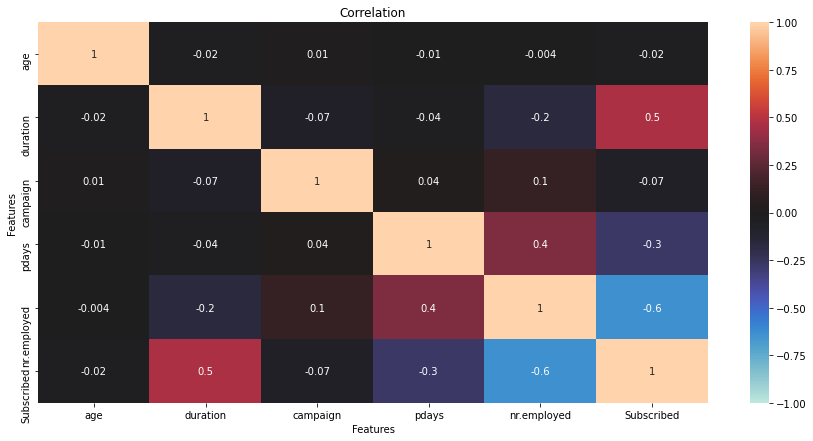

In [24]:
fig,ax = plt.subplots()
fig.set_size_inches(15,7)
ax = sns.heatmap(data.corr(), annot = True, fmt='.1g', 
                 vmin=-1, vmax=1, center= 0)
plt.title("Correlation", y=1)
plt.xlabel("Features")
plt.ylabel("Features")

1 shows the strong relationshiop

0 shows no relatopnship

-1 shows negative relationship

#### they shows the coorelation between the target variable with other variable
subscribed have -ve correlation (-0.6) ( very weak correlation ) with number of employees  

subscribed have -ve(-0.3) correlation between Pdays 

subscribed have -ve correlation (-0.07) (very weak correlation ) with number of campaign 

subscribed have -ve(-0.02) correlation ( weak correlation ) with Age

subscribed have +ve(0.5) correlation between duration 


### Pie Chart

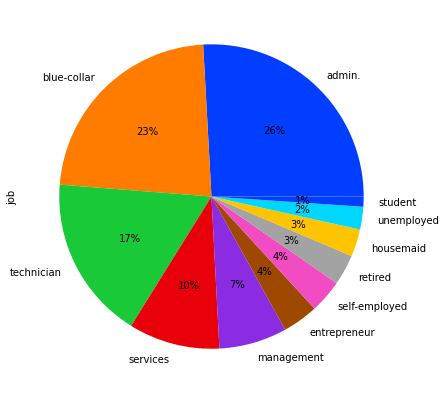

<Figure size 432x288 with 0 Axes>

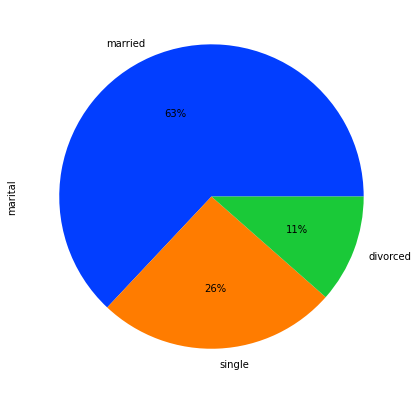

<Figure size 432x288 with 0 Axes>

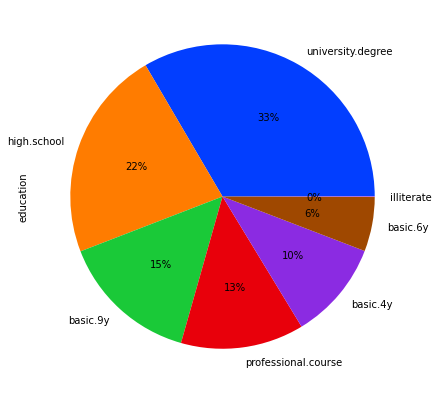

<Figure size 432x288 with 0 Axes>

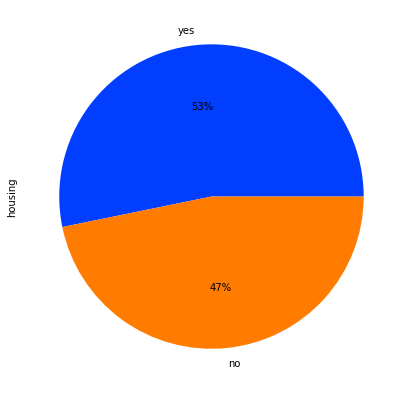

<Figure size 432x288 with 0 Axes>

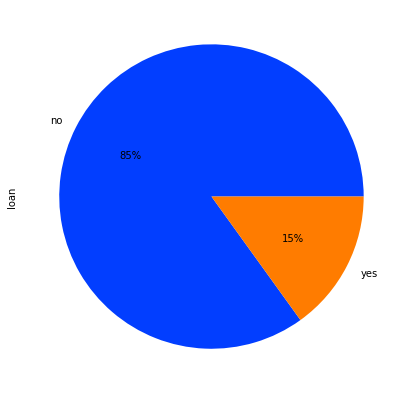

<Figure size 432x288 with 0 Axes>

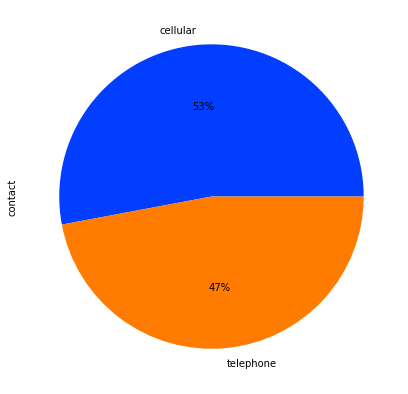

<Figure size 432x288 with 0 Axes>

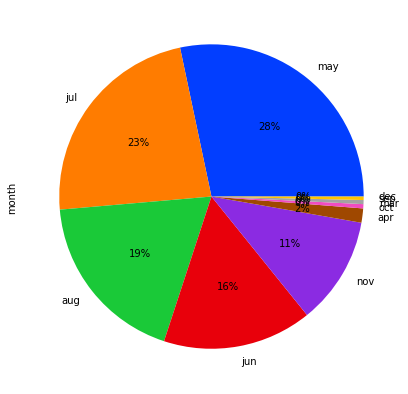

<Figure size 432x288 with 0 Axes>

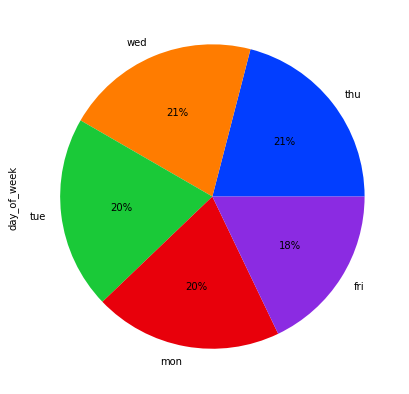

<Figure size 432x288 with 0 Axes>

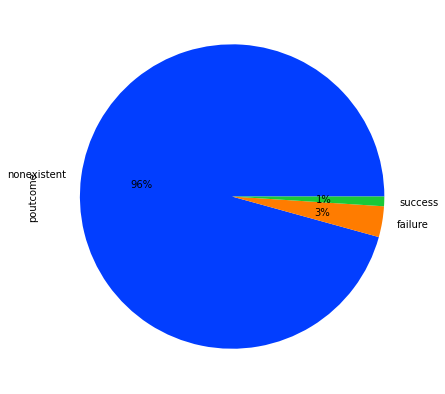

<Figure size 432x288 with 0 Axes>

In [25]:
for col in data.select_dtypes('object'):
    plt.figure(figsize = (10,7))
    # define Seaborn color palette to use
    palette_color = sns.color_palette('bright')
  
    # plotting data on chart
    data[col].value_counts().plot.pie( colors=palette_color, autopct='%.0f%%')
    plt.figure()

### pair plot

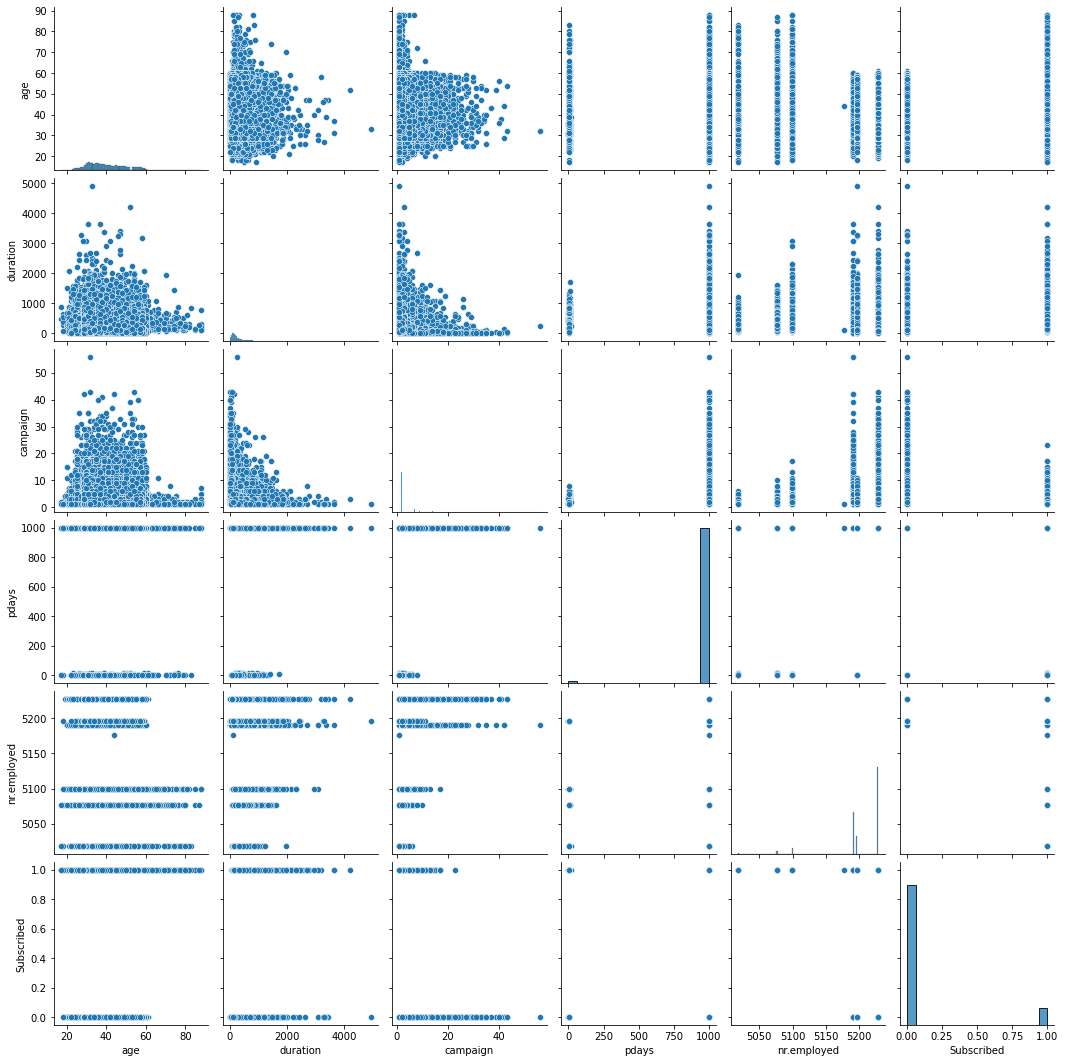

In [26]:
sns.pairplot(data)

In [27]:
data['Subscribed']

0        1
1        1
2        1
3        1
4        1
        ..
29266    0
29267    0
29268    0
29269    0
29270    0
Name: Subscribed, Length: 29271, dtype: int64

### Pre-Processing

#### now we  basic.9y, basic.6y and basic.4y. I convert them to "middle.shool"

In [28]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    data.loc[data['education'] == i, 'education'] = "middle.school"

data['education'].value_counts()

university.degree      9789
middle.school          9073
high.school            6563
professional.course    3831
illiterate               15
Name: education, dtype: int64

In [29]:
data['education'].value_counts()

university.degree      9789
middle.school          9073
high.school            6563
professional.course    3831
illiterate               15
Name: education, dtype: int64

###### There is also a issue in pdays feature. if the value is 999, then it will be replaced with a 0 which means that the client was not previously contacted.

In [30]:
data.loc[data['pdays'] == 999, 'pdays'] = 0

In [31]:
data.pdays.value_counts()

0     28959
3       113
4        49
6        46
2        27
5        15
10       12
13        9
15        9
11        7
9         5
12        5
1         5
7         5
8         2
14        2
16        1
Name: pdays, dtype: int64

## Graphical relatioship between target variable with other 

##### Subscribed /Age

<AxesSubplot:xlabel='age', ylabel='Density'>

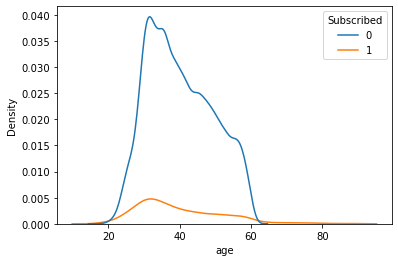

In [32]:
sns.kdeplot(data=data, x="age", hue="Subscribed")

#### Subscribed / Marital

<AxesSubplot:xlabel='marital', ylabel='count'>

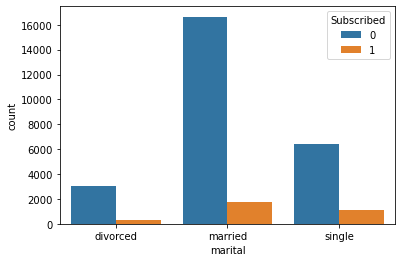

In [33]:
sns.countplot(data=data, x="marital", hue="Subscribed")


#### Subscribed / job

<AxesSubplot:xlabel='job', ylabel='count'>

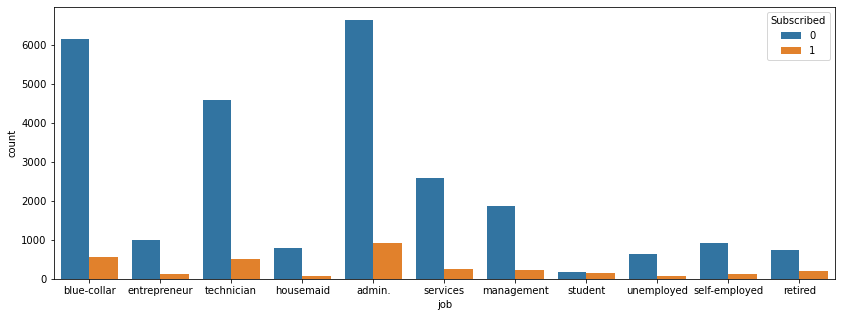

In [34]:
plt.figure(figsize=(14,5))

sns.countplot(data=data, x="job", hue="Subscribed")




#### Subscribed / Education

<AxesSubplot:xlabel='education', ylabel='count'>

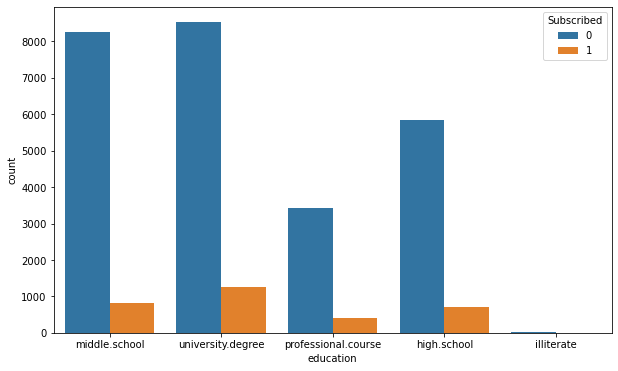

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x="education", hue="Subscribed")




#### Subscribed / loan

<AxesSubplot:xlabel='loan', ylabel='count'>

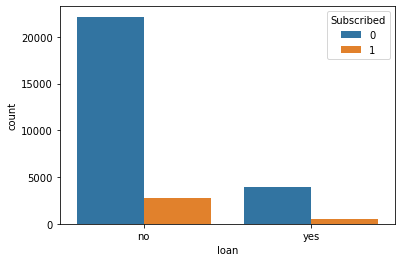

In [36]:
sns.countplot(x='loan',data=data,hue='Subscribed')



#### Subscribed / poutcome

<AxesSubplot:xlabel='poutcome', ylabel='count'>

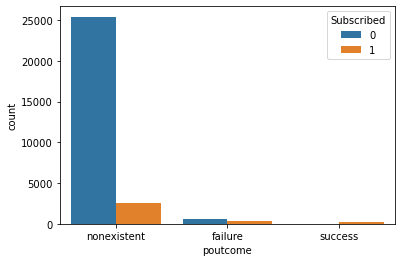

In [37]:
sns.countplot(x='poutcome',data=data,hue='Subscribed')



#### Subscribed / contact

<AxesSubplot:xlabel='contact', ylabel='count'>

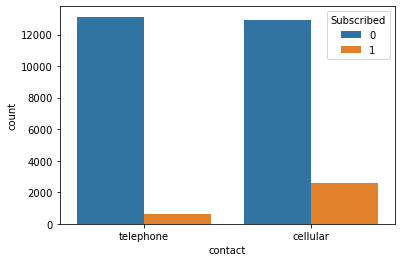

In [38]:
sns.countplot(x='contact',data=data,hue='Subscribed')


#### Subscribed / housing

<AxesSubplot:xlabel='housing', ylabel='count'>

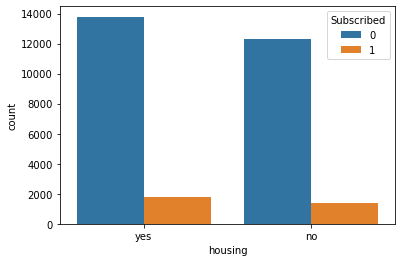

In [39]:
sns.countplot(x='housing',data=data,hue='Subscribed')


### Label encoding

In [40]:
from sklearn import preprocessing

In [41]:
le = preprocessing.LabelEncoder()
objects = ["job","marital","education","housing","loan","contact","month","day_of_week","poutcome"]
for i in objects:  
    data[i] = le.fit_transform(data[i])

In [42]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,1,0,2,1,0,1,6,1,1575,1,0,1,5191.0,1
1,49,2,1,4,1,0,1,6,1,1042,1,0,1,5191.0,1
2,49,9,1,2,0,0,1,6,1,1467,1,0,1,5191.0,1
3,41,9,1,3,1,0,1,6,1,579,1,0,1,5191.0,1
4,45,1,1,2,1,0,1,6,1,461,1,0,1,5191.0,1


### Split data  set

In [43]:
x=data.drop('Subscribed' , axis=1)
y=data['Subscribed']

In [44]:
x.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed
0,41,1,0,2,1,0,1,6,1,1575,1,0,1,5191.0
1,49,2,1,4,1,0,1,6,1,1042,1,0,1,5191.0
2,49,9,1,2,0,0,1,6,1,1467,1,0,1,5191.0
3,41,9,1,3,1,0,1,6,1,579,1,0,1,5191.0
4,45,1,1,2,1,0,1,6,1,461,1,0,1,5191.0


In [45]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Subscribed, dtype: int64

### Test train split data set / Model Selction

In [46]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train, y_test =train_test_split(x,y,test_size=0.2 ,random_state=0)

In [47]:
print('size of x_train' , x_train.shape)
print('size of x_test' , x_test.shape)
print('size of y_train' , x_train.shape)
print('size of y_test' , x_test.shape)

size of x_train (23416, 14)
size of x_test (5855, 14)
size of y_train (23416, 14)
size of y_test (5855, 14)


## Model selection

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression().fit(x_train ,y_train)

#### Model Evalotion


In [49]:
logmodel.score(x_test, y_test)
logmodel.score(x_train , y_train)

print('Score for test model =' , logmodel.score(x_test , y_test)  )
print('Score for train model =' , logmodel.score(x_train , y_train) )

Score for test model = 0.9122117847993169
Score for train model = 0.9115562008882815


In [50]:
logpred=logmodel.predict(x_test)

#### Actual value vs Predicted value

In [51]:
logmodeldiff = pd.DataFrame({'Actual_value' : y_test.squeeze() , "Model prediction" : logmodel.predict(x_test).squeeze() })
logmodeldiff

,Actual_value,Model prediction
20417,0,0
26553,0,0
18943,0,0
25641,0,0
19421,0,1
...,...,...
10056,0,0
10872,0,0
5355,0,0
17327,0,0


In [52]:
from sklearn import metrics
log_score = metrics.accuracy_score(y_test, logpred)
log_score

0.9122117847993169

##### Our(Logistics Model) accuracy score is 91.22% percent, which is extremely good 

#### Confusion metrix

In [53]:
from sklearn.metrics import confusion_matrix
logcm=confusion_matrix(y_test,logpred)
print(logcm)


[[5138   91]
 [ 423  203]]


In [54]:
print('\nTrue Positives(TP) = ', logcm[0,0])

print('\nTrue Negatives(TN) = ', logcm[1,1])

print('\nFalse Positives(FP) = ', logcm[0,1])

print('\nFalse Negatives(FN) = ', logcm[1,0])


True Positives(TP) =  5138

True Negatives(TN) =  203

False Positives(FP) =  91

False Negatives(FN) =  423


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logpred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5229
           1       0.69      0.32      0.44       626

    accuracy                           0.91      5855
   macro avg       0.81      0.65      0.70      5855
weighted avg       0.90      0.91      0.90      5855



In [56]:
# precision rate , recall , f1-score are high means client subscribes a term deposit

# precision rate , recall , f1-score are lower means client did not subscribes a term deposit

Text(0.5, 1.0, 'Logistics Regression model accuracy : 91.22117847993168% ')

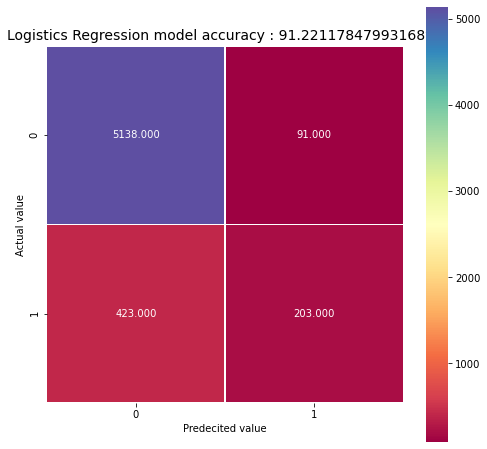

In [57]:
plt.figure(figsize=(8,8))
sns.heatmap(logcm ,annot=True, fmt='.3f' , linewidths=.5 ,square=True , cmap='Spectral' )
plt.ylabel('Actual value')
plt.xlabel('Predecited value')
all_sample_title ='Logistics Regression model accuracy : {0}% '.format( log_score * 100)
plt.title(all_sample_title, size  =14)

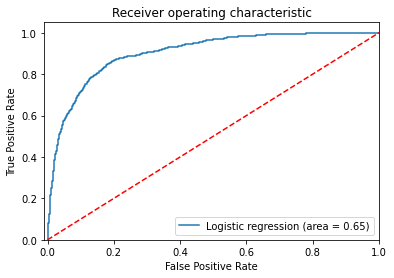

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Decision tree

A decision tree is a simple, decision making-diagram.

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt_model=DecisionTreeClassifier().fit(x_train,y_train)
dt_model

DecisionTreeClassifier()

##### Prediction

In [61]:
dt_pred= dt_model.predict(x_test)

#### Actual vs Prediction

In [62]:
dtmodeldiff = pd.DataFrame({'Actual_value' : y_test.squeeze() , "Model prediction" : dt_model.predict(x_test).squeeze() })
dtmodeldiff

,Actual_value,Model prediction
20417,0,0
26553,0,0
18943,0,0
25641,0,0
19421,0,1
...,...,...
10056,0,0
10872,0,0
5355,0,0
17327,0,0


#### Score

In [63]:
from sklearn.metrics import accuracy_score
dt_score = accuracy_score(y_test,dt_pred)
dt_score

0.9443210930828352

#### Our(decision Tree) accuracy score is 94.45% percent, which is extra-ordinary 

#### Model Evaluation

In [64]:
dt_model.score(x_test, y_test)
dt_model.score(x_train , y_train)

print('Score for test model =' , dt_model.score(x_test , y_test)  )


Score for test model = 0.9443210930828352


#### Classifiaction report

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5229
           1       0.73      0.76      0.75       626

    accuracy                           0.94      5855
   macro avg       0.85      0.86      0.86      5855
weighted avg       0.95      0.94      0.94      5855



#### Confusion metrics

In [66]:
from sklearn.metrics import plot_confusion_matrix
dtcm = metrics.confusion_matrix(y_test , dt_pred)
dtcm

array([[5051,  178],
       [ 148,  478]], dtype=int64)

In [67]:

print('\nTrue Positives(TP) = ', dtcm[0,0])

print('\nTrue Negatives(TN) = ', dtcm[1,1])

print('\nFalse Positives(FP) = ', dtcm[0,1])

print('\nFalse Negatives(FN) = ', dtcm[1,0])


True Positives(TP) =  5051

True Negatives(TN) =  478

False Positives(FP) =  178

False Negatives(FN) =  148


In [68]:
dt_score = metrics.accuracy_score(y_test, dt_pred)
print('accutracy score is =', dt_score * 100,'%' )

accutracy score is = 94.43210930828351 %


Text(0.5, 1.0, 'Decision tree model accuracy : 94.43210930828351% ')

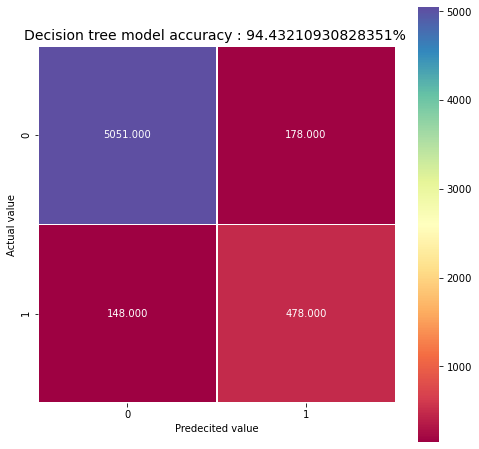

In [69]:
plt.figure(figsize=(8,8))
sns.heatmap(dtcm ,annot=True, fmt='.3f' , linewidths=.5 ,square=True , cmap='Spectral' )
plt.ylabel('Actual value')
plt.xlabel('Predecited value')
all_sample_title ='Decision tree model accuracy : {0}% '.format(dt_score * 100)
plt.title(all_sample_title, size  =14)

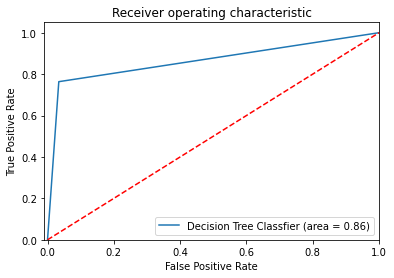

In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, dt_model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classfier (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### ROC AUC Comparison 


Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.

A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:


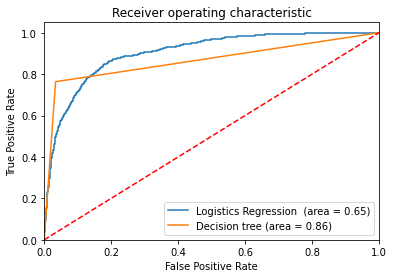

In [71]:
# Logistics Regression 
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(x_test))
log_fpr, log_tpr, log_thresholds = roc_curve(y_test, logmodel.predict_proba(x_test)[:,1])
# Decision Tree
dt_roc_auc = roc_auc_score(y_test, dt_model.predict(x_test))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(log_fpr, log_tpr, label='Logistics Regression  (area = %0.2f)' % logit_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

In [72]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Decision Tree'],
    'Score': [ log_score ,
              dt_score],
    "ROC AUC Score" : [logit_roc_auc, 
                      dt_roc_auc]})
models.sort_values(by='Score', ascending=False)

,Model,Score,ROC AUC Score
1,Decision Tree,0.944321,0.864769
0,Logistic Regression,0.912212,0.653439
